5. Implement the Continuous Bag of Words (CBOW) Model. Stages can be:
<br>
a. Data preparation
<br>
b. Generate training data
<br>
c. Train model
<br>
d. Output 

Video link - https://youtu.be/Q95SIG4g7SA?si=QOjS5tqjIzzk2bEl

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding, Lambda
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import re

This code imports necessary libraries and modules for implementing the Continuous Bag of Words (CBOW) model. Here's an explanation of each import statement:

1. `import tensorflow as tf`: Imports the TensorFlow library, which is an open-source machine learning framework developed by Google for building and training machine learning models.

2. `from tensorflow.keras.models import Sequential`: Imports the Sequential class from the `tensorflow.keras.models` module. `Sequential` is used to create linear stack of layers for building neural networks layer by layer.

3. `from tensorflow.keras.layers import Dense, Embedding, Lambda`: Imports specific layer classes (`Dense`, `Embedding`, and `Lambda`) from the `tensorflow.keras.layers` module. 
    - `Dense`: A regular densely connected neural network layer.
    - `Embedding`: Represents an embedding layer that maps integers (representing specific words) to dense vectors of fixed size.
    - `Lambda`: Allows you to wrap arbitrary expressions as a Layer object.

4. `from tensorflow.keras.preprocessing.text import Tokenizer`: Imports the `Tokenizer` class from the `tensorflow.keras.preprocessing.text` module. `Tokenizer` is used to convert text into tokens (words or subwords) for text processing tasks.

5. `import numpy as np`: Imports the NumPy library, a powerful library for numerical computing in Python. NumPy provides support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

6. `import matplotlib.pyplot as plt`: Imports the `pyplot` module from the Matplotlib library. Matplotlib is a popular data visualization library in Python, and `pyplot` provides a convenient interface for creating static, animated, and interactive plots and figures.

7. `from sklearn.decomposition import PCA`: Imports the PCA (Principal Component Analysis) class from the scikit-learn library. PCA is a dimensionality reduction technique used for visualizing high-dimensional data in lower dimensions while preserving important features.

8. `import re`: Imports the regular expression module in Python. Regular expressions (regex) are used for pattern matching and manipulation of strings in text processing tasks.



#### a. Data preparation

In [19]:
data = """We are about to study the idea of a computational process.
Computational processes are abstract beings that inhabit computers.
As they evolve, processes manipulate other abstract things called data.
The evolution of a process is directed by a pattern of rules
called a program. People create programs to direct processes. In effect,
we conjure the spirits of the computer with our spells."""

In [20]:
sentences = data.split(".")

In [21]:
sentences

['We are about to study the idea of a computational process',
 '\nComputational processes are abstract beings that inhabit computers',
 '\nAs they evolve, processes manipulate other abstract things called data',
 '\nThe evolution of a process is directed by a pattern of rules\ncalled a program',
 ' People create programs to direct processes',
 ' In effect,\nwe conjure the spirits of the computer with our spells',
 '']

In [5]:
#Clean Data
clean_sentences = []
for sentence in sentences:
    # skip empty string
    if sentence == "":
        continue;
    # remove special characters
    sentence = re.sub('[^A-Za-z0-9]+', ' ', sentence)
    # remove 1 letter words
    sentence = re.sub(r'(?:^| )\w(?:$| )', ' ', sentence).strip()
    # lower all characters
    sentence = sentence.lower()
    clean_sentences.append(sentence)

This code snippet performs the "Data Preparation" stage. It processes a list of sentences, cleaning and preprocessing the text data before using it to train the Continuous Bag of Words (CBOW) model. Here's what each step does:

1. **Loop through Sentences:**
   ```python
   clean_sentences = []
   for sentence in sentences:
   ```
   It initializes an empty list `clean_sentences` to store the cleaned versions of the input sentences. The loop iterates through each sentence in the `sentences` list.

2. **Skip Empty Sentences:**
   ```python
   if sentence == "":
       continue;
   ```
   This conditional statement checks if the current sentence is empty. If it is empty, the loop skips to the next iteration using the `continue` statement.

3. **Remove Special Characters:**
   ```python
   sentence = re.sub('[^A-Za-z0-9]+', ' ', sentence)
   ```
   This line of code uses a regular expression (`re.sub()`) to remove all special characters from the `sentence`. It replaces any non-alphanumeric characters with a space (' ').

4. **Remove Single Letter Words:**
   ```python
   sentence = re.sub(r'(?:^| )\w(?:$| )', ' ', sentence).strip()
   ```
   This regular expression removes single-letter words from the `sentence`. It matches and removes any standalone single letter, surrounded by spaces. The `strip()` function removes any leading or trailing spaces after the removal of single-letter words.

5. **Convert to Lowercase:**
   ```python
   sentence = sentence.lower()
   ```
   This line converts all characters in the `sentence` to lowercase. This ensures that the model treats uppercase and lowercase versions of the same word as identical, preventing the model from treating them as distinct tokens.

6. **Append Cleaned Sentence:**
   ```python
   clean_sentences.append(sentence)
   ```
   Finally, the cleaned `sentence` is added to the `clean_sentences` list after all the preprocessing steps have been applied.

After this loop completes for all sentences in the input `sentences` list, the `clean_sentences` list contains the preprocessed and cleaned version of the input data. These clean sentences can then be used for generating training data and training the CBOW model.

In [22]:
clean_sentences

['we are about to study the idea of computational process',
 'computational processes are abstract beings that inhabit computers',
 'as they evolve processes manipulate other abstract things called data',
 'the evolution of process is directed by pattern of rules called program',
 'people create programs to direct processes',
 'in effect we conjure the spirits of the computer with our spells']

In [24]:
# Define the corpus
corpus = clean_sentences

# Convert the corpus to a sequence of integers
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)
print("After converting our words in the corpus \
into vector of integers:")
print(sequences)

After converting our words in the corpus into vector of integers:
[[4, 5, 11, 6, 12, 1, 13, 2, 7, 8], [7, 3, 5, 9, 14, 15, 16, 17], [18, 19, 20, 3, 21, 22, 9, 23, 10, 24], [1, 25, 2, 8, 26, 27, 28, 29, 2, 30, 10, 31], [32, 33, 34, 6, 35, 3], [36, 37, 4, 38, 1, 39, 2, 1, 40, 41, 42, 43]]


This code block is responsible for converting the cleaned sentences (corpus) into sequences of integers. It also demonstrates the use of the `Tokenizer` class from TensorFlow's Keras API. Here's a step-by-step explanation:

1. **Define the Corpus:**
   ```python
   corpus = clean_sentences
   ```
   The variable `corpus` is set to the list of previously cleaned and preprocessed sentences stored in `clean_sentences`.

2. **Create a Tokenizer:**
   ```python
   tokenizer = Tokenizer()
   ```
   An instance of the `Tokenizer` class is created. The `Tokenizer` is used to convert text data into numerical sequences.

3. **Fit the Tokenizer on the Corpus:**
   ```python
   tokenizer.fit_on_texts(corpus)
   ```
   The `fit_on_texts` method of the `Tokenizer` is called with the `corpus` as its argument. This step processes the text data and builds an internal vocabulary, mapping words to unique integer indices. It prepares the tokenizer to convert words to integers using this vocabulary.

4. **Convert the Corpus to Sequences of Integers:**
   ```python
   sequences = tokenizer.texts_to_sequences(corpus)
   ```
   The `texts_to_sequences` method of the `tokenizer` is called with the `corpus` as input. This method replaces each word in the `corpus` with its corresponding integer index from the vocabulary created earlier. As a result, you get a list of sequences, where each sequence represents a sentence as a sequence of integer values.

5. **Print the Sequences:**
   ```python
   print("After converting our words in the corpus into vector of integers:")
   print(sequences)
   ```
   This code block prints the resulting sequences of integers. These sequences are ready to be used as input data for training the Continuous Bag of Words (CBOW) model. Each integer in a sequence represents a word in the corpus, and the sequences can be used to predict the target word based on the context words in the CBOW model.

After this code block, you have successfully converted your text data into sequences of integers, which can be used to generate training data for the CBOW model.

In [9]:
# creating dictionary for word to index and index to word
index_to_word_map = {}
word_to_index_map = {}
for index_1, sequence in enumerate(sequences):
    print(sequence)
    words_in_sentence = clean_sentences[index_1].split()
    print(words_in_sentence)
    for index_2, value in enumerate(sequence):
        index_to_word_map[value] = words_in_sentence[index_2]
        word_to_index_map[words_in_sentence[index_2]] = value

[4, 5, 11, 6, 12, 1, 13, 2, 7, 8]
['we', 'are', 'about', 'to', 'study', 'the', 'idea', 'of', 'computational', 'process']
[7, 3, 5, 9, 14, 15, 16, 17]
['computational', 'processes', 'are', 'abstract', 'beings', 'that', 'inhabit', 'computers']
[18, 19, 20, 3, 21, 22, 9, 23, 10, 24]
['as', 'they', 'evolve', 'processes', 'manipulate', 'other', 'abstract', 'things', 'called', 'data']
[1, 25, 2, 8, 26, 27, 28, 29, 2, 30, 10, 31]
['the', 'evolution', 'of', 'process', 'is', 'directed', 'by', 'pattern', 'of', 'rules', 'called', 'program']
[32, 33, 34, 6, 35, 3]
['people', 'create', 'programs', 'to', 'direct', 'processes']
[36, 37, 4, 38, 1, 39, 2, 1, 40, 41, 42, 43]
['in', 'effect', 'we', 'conjure', 'the', 'spirits', 'of', 'the', 'computer', 'with', 'our', 'spells']


In this code block, two dictionaries (`index_to_word_map` and `word_to_index_map`) are created to map words to their corresponding integer indices and vice versa. Here's what each step does:

1. **Initialize Empty Dictionaries:**
   ```python
   index_to_word_map = {}
   word_to_index_map = {}
   ```
   Two empty dictionaries, `index_to_word_map` and `word_to_index_map`, are initialized. These dictionaries will be used to store the mapping between words and their corresponding integer indices.

2. **Loop through Sequences and Words:**
   ```python
   for index_1, sequence in enumerate(sequences):
       words_in_sentence = clean_sentences[index_1].split()
       for index_2, value in enumerate(sequence):
   ```
   The code uses nested loops to iterate over each sequence of integers (`sequence`) and the corresponding words in the original cleaned sentences (`words_in_sentence`).

3. **Create Mapping:**
   ```python
   index_to_word_map[value] = words_in_sentence[index_2]
   word_to_index_map[words_in_sentence[index_2]] = value
   ```
   For each word in the `words_in_sentence`, the code maps the integer index (`value`) to the word in `index_to_word_map` and maps the word to the integer index in `word_to_index_map`. This creates a bidirectional mapping between words and their corresponding indices.

   - `index_to_word_map`: Maps integers to words. The keys are integer indices, and the values are the corresponding words from the sentences.
   - `word_to_index_map`: Maps words to integers. The keys are words, and the values are the corresponding integer indices.

After this code block, you have created two dictionaries that allow you to easily look up the index of a word (`word_to_index_map`) or retrieve the word given its index (`index_to_word_map`). These mappings are essential for converting words to integers when preparing the input data for the Continuous Bag of Words (CBOW) model.

In [25]:
print(index_to_word_map)
print("\n")
print(word_to_index_map)

{4: 'we', 5: 'are', 11: 'about', 6: 'to', 12: 'study', 1: 'the', 13: 'idea', 2: 'of', 7: 'computational', 8: 'process', 3: 'processes', 9: 'abstract', 14: 'beings', 15: 'that', 16: 'inhabit', 17: 'computers', 18: 'as', 19: 'they', 20: 'evolve', 21: 'manipulate', 22: 'other', 23: 'things', 10: 'called', 24: 'data', 25: 'evolution', 26: 'is', 27: 'directed', 28: 'by', 29: 'pattern', 30: 'rules', 31: 'program', 32: 'people', 33: 'create', 34: 'programs', 35: 'direct', 36: 'in', 37: 'effect', 38: 'conjure', 39: 'spirits', 40: 'computer', 41: 'with', 42: 'our', 43: 'spells'}


{'we': 4, 'are': 5, 'about': 11, 'to': 6, 'study': 12, 'the': 1, 'idea': 13, 'of': 2, 'computational': 7, 'process': 8, 'processes': 3, 'abstract': 9, 'beings': 14, 'that': 15, 'inhabit': 16, 'computers': 17, 'as': 18, 'they': 19, 'evolve': 20, 'manipulate': 21, 'other': 22, 'things': 23, 'called': 10, 'data': 24, 'evolution': 25, 'is': 26, 'directed': 27, 'by': 28, 'pattern': 29, 'rules': 30, 'program': 31, 'people':

#### b. Generate training data

In [11]:
# Define the parameters
vocab_size = len(word_to_index_map) + 1
embedding_size = 10
window_size = 2

# Generate the context-target pairs
contexts = []
targets = []
for sequence in sequences:
	for i in range(window_size, len(sequence) - window_size):
		context = sequence[i - window_size:i] + sequence[i + 1:i + window_size + 1]
		target = sequence[i]
		contexts.append(context)
		targets.append(target)

In this code block, the parameters for the Continuous Bag of Words (CBOW) model are defined, and the context-target pairs are generated based on the specified window size. Here's what each part of the code does:

1. **Define Parameters:**
   ```python
   vocab_size = len(tokenizer.word_index) + 1
   embedding_size = 10
   window_size = 2
   ```
   - `vocab_size`: Represents the size of the vocabulary. It is calculated as the total number of unique words in the corpus (as obtained from the tokenizer) plus 1. The additional 1 accounts for the out-of-vocabulary (OOV) token.
   - `embedding_size`: Specifies the dimensionality of the word embeddings. Each word in the vocabulary will be represented as a dense vector of this size.
   - `window_size`: Determines the number of words to consider to the left and right of the target word when generating context-target pairs. In this case, it is set to 2, meaning there will be 2 words to the left and 2 words to the right of the target word in the context window.

2. **Generate Context-Target Pairs:**
   ```python
   contexts = []
   targets = []
   for sequence in sequences:
       for i in range(window_size, len(sequence) - window_size):
           context = sequence[i - window_size:i] + sequence[i + 1:i + window_size + 1]
           target = sequence[i]
           contexts.append(context)
           targets.append(target)
   ```
   This nested loop iterates over each sequence of integers (`sequence`) in the `sequences` list. For each sequence, it considers a sliding window of size `window_size * 2 + 1` centered around the current word (indexed by `i`). It constructs the context by including words from `i - window_size` to `i - 1` and from `i + 1` to `i + window_size`. The target word is the word at index `i`.

   - `contexts`: A list containing the context words (as sequences of integers) for each target word.
   - `targets`: A list containing the target words (as integers) corresponding to the context words.

These context-target pairs will be used as training data for the CBOW model. The model will learn to predict the target word based on its surrounding context words within the specified window size.

In [12]:
# sample of training data
for i in range(5):
    words = []
    target = index_to_word_map.get(targets[i])
    for j in contexts[i]:
        words.append(index_to_word_map.get(j))
    print(words, "=>", target)

['we', 'are', 'to', 'study'] => about
['are', 'about', 'study', 'the'] => to
['about', 'to', 'the', 'idea'] => study
['to', 'study', 'idea', 'of'] => the
['study', 'the', 'of', 'computational'] => idea


In [13]:
# Convert the contexts and targets to numpy arrays
X = np.array(contexts)
Y = np.array(targets)

#### c. Train model

In [14]:
# Define the CBOW model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=2 * window_size))
model.add(Lambda(lambda x: tf.reduce_mean(x, axis=1)))
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(units=vocab_size, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X, Y, epochs=200, verbose=1)

Epoch 1/200
2/2 [==============================] - 1s 7ms/step - loss: 3.7842 - accuracy: 0.0000e+00
Epoch 2/200
2/2 [==============================] - 0s 3ms/step - loss: 3.7754 - accuracy: 0.2059
Epoch 3/200
2/2 [==============================] - 0s 5ms/step - loss: 3.7684 - accuracy: 0.1765
Epoch 4/200
2/2 [==============================] - 0s 6ms/step - loss: 3.7610 - accuracy: 0.1471
Epoch 5/200
2/2 [==============================] - 0s 8ms/step - loss: 3.7527 - accuracy: 0.2353
Epoch 6/200
2/2 [==============================] - 0s 6ms/step - loss: 3.7433 - accuracy: 0.2059
Epoch 7/200
2/2 [==============================] - 0s 6ms/step - loss: 3.7327 - accuracy: 0.2353
Epoch 8/200
2/2 [==============================] - 0s 7ms/step - loss: 3.7208 - accuracy: 0.2353
Epoch 9/200
2/2 [==============================] - 0s 4ms/step - loss: 3.7069 - accuracy: 0.2059
Epoch 10/200
2/2 [==============================] - 0s 6ms/step - loss: 3.6910 - accuracy: 0.2059
Epoch 11/200
2/2 [=======

2/2 [==============================] - 0s 6ms/step - loss: 0.2192 - accuracy: 0.9412
Epoch 168/200
2/2 [==============================] - 0s 4ms/step - loss: 0.2049 - accuracy: 0.9412
Epoch 169/200
2/2 [==============================] - 0s 5ms/step - loss: 0.1898 - accuracy: 0.9412
Epoch 170/200
2/2 [==============================] - 0s 5ms/step - loss: 0.1779 - accuracy: 0.9706
Epoch 171/200
2/2 [==============================] - 0s 4ms/step - loss: 0.1670 - accuracy: 0.9706
Epoch 172/200
2/2 [==============================] - 0s 4ms/step - loss: 0.1565 - accuracy: 0.9706
Epoch 173/200
2/2 [==============================] - 0s 6ms/step - loss: 0.1518 - accuracy: 1.0000
Epoch 174/200
2/2 [==============================] - 0s 6ms/step - loss: 0.1542 - accuracy: 0.9706
Epoch 175/200
2/2 [==============================] - 0s 3ms/step - loss: 0.1655 - accuracy: 0.9706
Epoch 176/200
2/2 [==============================] - 0s 4ms/step - loss: 0.1506 - accuracy: 0.9706
Epoch 177/200
2/2 [=====

In this code block, the Continuous Bag of Words (CBOW) model is defined, compiled, and trained. Let me explain each part of the code:

1. **Define the CBOW Model:**
   ```python
   model = Sequential()
   model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=2 * window_size))
   model.add(Lambda(lambda x: tf.reduce_mean(x, axis=1)))
   model.add(Dense(256, activation='relu'))
   model.add(Dense(512, activation='relu'))
   model.add(Dense(units=vocab_size, activation='softmax'))
   ```
   - `Sequential()`: Initializes a sequential model, which is a linear stack of layers.
   - `Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=2 * window_size)`: Adds an embedding layer to the model. The embedding layer converts integer indices (representing words) into dense vectors of fixed size (`embedding_size`).
   - `Lambda(lambda x: tf.reduce_mean(x, axis=1))`: Adds a Lambda layer that calculates the mean of the embeddings along axis 1. This step averages the embeddings of the context words.
   - `Dense(256, activation='relu')`: Adds a fully connected dense layer with 256 units and ReLU activation function.
   - `Dense(512, activation='relu')`: Adds another fully connected dense layer with 512 units and ReLU activation function.
   - `Dense(units=vocab_size, activation='softmax')`: Adds the output layer with `vocab_size` units (equal to the number of unique words in the vocabulary) and softmax activation function. This layer produces a probability distribution over the vocabulary, allowing the model to predict the next word.

2. **Compile the Model:**
   ```python
   model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
   ```
   The model is compiled with the specified loss function (`sparse_categorical_crossentropy`), optimizer (`adam`), and evaluation metric (`accuracy`). The model will optimize its weights to minimize the categorical crossentropy loss between the predicted and actual word indices.

3. **Train the Model:**
   ```python
   model.fit(X, Y, epochs=200, verbose=1)
   ```
   This line trains the model using the input data `X` (context word sequences) and target data `Y` (target word indices) for 200 epochs. The `verbose=1` argument indicates that training progress will be displayed during the training process.

After training, the model's weights will be optimized, allowing it to predict the target word based on the surrounding context words within the specified window size.

**d.output**

In [15]:
# Get the word embeddings
embeddings = model.get_weights()[0]

# Perform PCA to reduce the dimensionality of the embeddings
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

In this code block, the word embeddings learned by the Continuous Bag of Words (CBOW) model are obtained and then reduced in dimensionality using Principal Component Analysis (PCA). Here's what each part of the code does:

1. **Get Word Embeddings from the Model:**
   ```python
   embeddings = model.get_weights()[0]
   ```
   The `get_weights()` method of the trained CBOW model retrieves the weights of the first layer, which is the embedding layer. The `embeddings` variable now contains the dense vectors representing each word in the vocabulary learned during training.

2. **Perform PCA to Reduce Dimensionality:**
   ```python
   pca = PCA(n_components=2)
   reduced_embeddings = pca.fit_transform(embeddings)
   ```
   An instance of the PCA class is created with `n_components=2`, indicating that PCA should reduce the dimensionality of the embeddings to 2 dimensions. The `fit_transform()` method applies PCA to the original embeddings, reducing their dimensionality and storing the result in the `reduced_embeddings` variable.

After these steps, `reduced_embeddings` contains the word embeddings in a lower-dimensional space (2D) obtained through PCA. These reduced embeddings can be used for visualization or further analysis to understand the relationships between words in the learned embedding space. Dimensionality reduction techniques like PCA are often used to visualize high-dimensional data in a more interpretable manner.

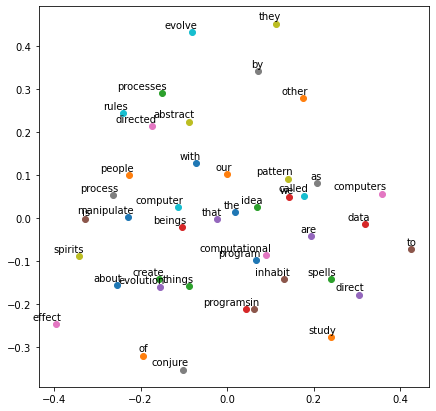

In [36]:
# Visualize the embeddings
plt.figure(figsize=(7, 7))
for i, word in enumerate(tokenizer.word_index.keys()): 
    x, y = reduced_embeddings[i]
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2),
                 textcoords='offset points',
               ha='right',va='bottom')
                
plt.show()

In [17]:
# test model
test_sentenses = [
    "we are to study",
    "create programs direct processes",
    "spirits process study program",
    "idea study people create"
]

In [18]:
for test_sentense in test_sentenses:
    test_words = test_sentense.split(" ")
    print("Words: ", test_words)
    
    x_test = [] 
    for i in test_words:
        x_test.append(word_to_index_map.get(i))
    x_test = np.array([x_test])
    print("Indexs: ", x_test)
    
    test_predictions = model.predict(x_test)
    y_pred = np.argmax(test_predictions[0])
    print("Predictons: ",test_words, " => ", index_to_word_map.get(y_pred))
    print("\n")

Words:  ['we', 'are', 'to', 'study']
Indexs:  [[ 4  5  6 12]]
1/1 [==============================] - 0s 82ms/step
Predictons:  ['we', 'are', 'to', 'study']  =>  about


Words:  ['create', 'programs', 'direct', 'processes']
Indexs:  [[33 34 35  3]]
1/1 [==============================] - 0s 21ms/step
Predictons:  ['create', 'programs', 'direct', 'processes']  =>  to


Words:  ['spirits', 'process', 'study', 'program']
Indexs:  [[39  8 12 31]]
1/1 [==============================] - 0s 17ms/step
Predictons:  ['spirits', 'process', 'study', 'program']  =>  the


Words:  ['idea', 'study', 'people', 'create']
Indexs:  [[13 12 32 33]]
1/1 [==============================] - 0s 19ms/step
Predictons:  ['idea', 'study', 'people', 'create']  =>  programs


